In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dark_horse = cv2.imread('../DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

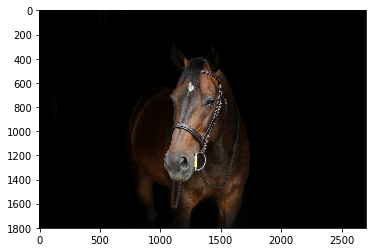

In [3]:
plt.imshow(show_horse)

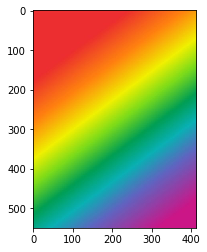

In [5]:
plt.imshow(show_rainbow)

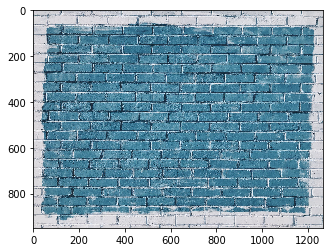

In [6]:
plt.imshow(show_bricks)

# OpenCV histogram

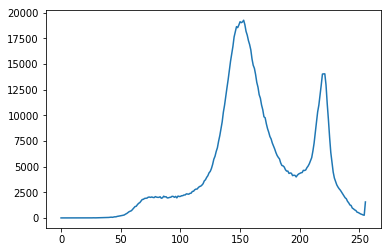

In [13]:
hist_values = cv2.calcHist([blue_bricks],[0],None,[256],[0,256])
hist_values.shape
plt.plot(hist_values)

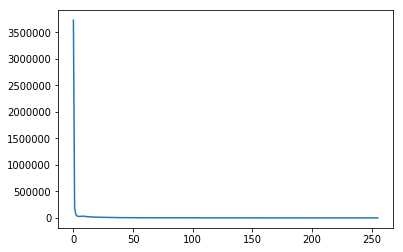

In [14]:
hist_values = cv2.calcHist([dark_horse],[0],None,[256],[0,256])
hist_values.shape
plt.plot(hist_values)

# Plotting 3 color Histograms

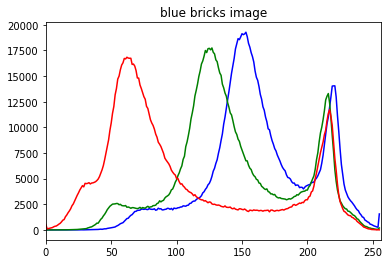

In [18]:
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color) :
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('blue bricks image')
plt.show()

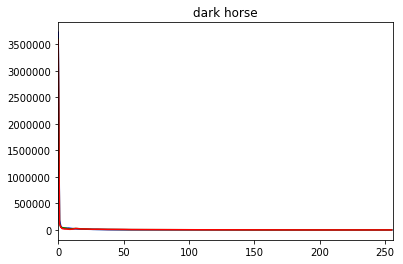

In [19]:
img = dark_horse
color  = ('b','g','r')
for i,col in enumerate(color) :
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('dark horse') 
plt.show()

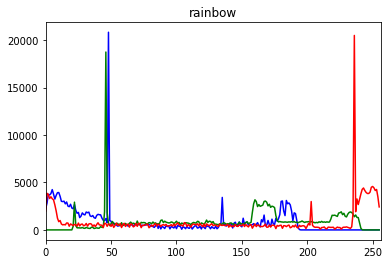

In [21]:
img = rainbow
color  = ('b','g','r')
for i,col in enumerate(color) :
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('rainbow') 
plt.show()

# Masking

In [24]:
img = rainbow
img.shape
img.shape[:2]

(550, 413)

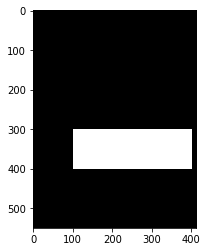

In [25]:
mask = np.zeros(img.shape[:2],np.uint8)
mask[300:400,100:400] = 255
plt.imshow(mask,cmap='gray')

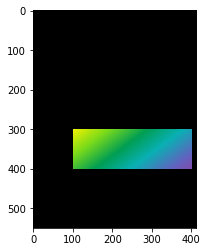

In [27]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)
plt.imshow(show_masked_img)

In [28]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Histogram for RED values of the full image')

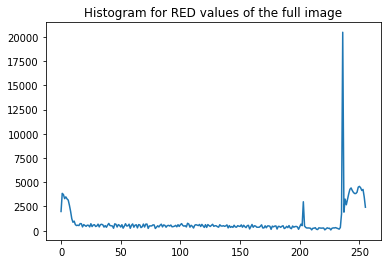

In [31]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5, 1.0, 'Histogram for RED values for the Masked Area')

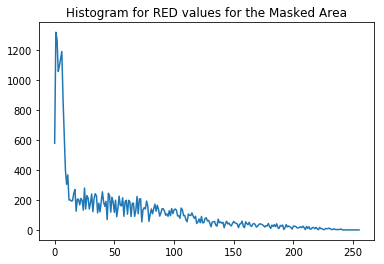

In [30]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values for the Masked Area')

# Single channel

# histogram equalization

In [32]:
gorilla = cv2.imread('../DATA/gorilla.jpg',0)

In [33]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

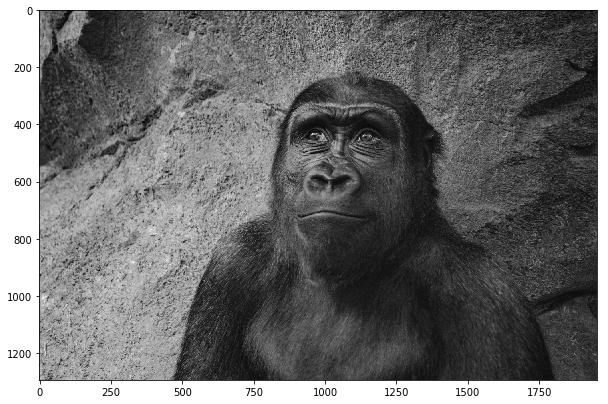

In [34]:
display(gorilla,'gray')

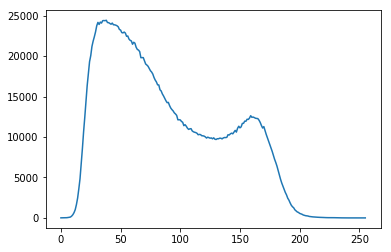

In [37]:
hist_values = cv2.calcHist([gorilla],[0],None,[256],[0,256])
plt.plot(hist_values)

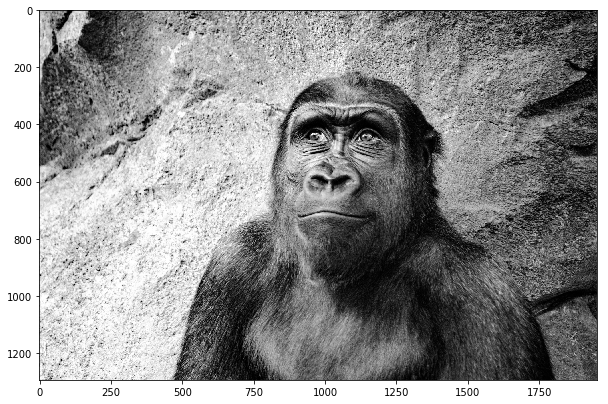

In [38]:
eq_gorilla = cv2.equalizeHist(gorilla)
display(eq_gorilla,'gray')

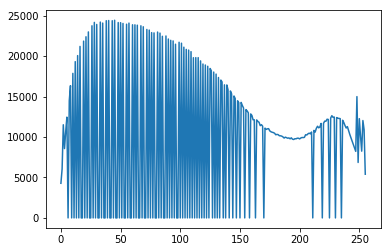

In [39]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

In [40]:
color_gorilla = cv2.imread('../DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
# Convert to HSV colorspace
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

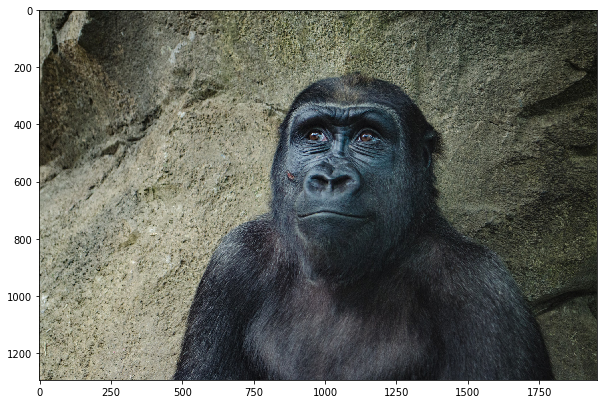

In [41]:
display(show_gorilla)

In [42]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

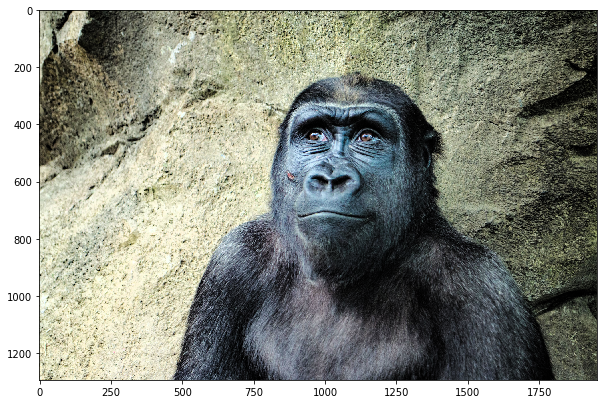

In [43]:
# Convert back to RGB to visualize
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)